In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.seasonal as sea
from statsmodels.tsa.stattools import acf
import statsmodels.graphics.tsaplots as sgt
from scipy.stats import boxcox
from statsmodels.tsa.seasonal import STL
import statsmodels.api as sm
from patsy import dmatrix
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.formula.api as smf
from scipy.stats import chi2
from scipy.stats import f
import matplotlib.pyplot as plt
# from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
# from scipy.stats import pearsonr
import pmdarima

In [2]:
datas = pd.date_range(start='2020-01-01', periods = 500)

datas = pd.DataFrame(datas, columns=['date'])
datas.index = datas.date
datas.index.name = ''
datas.drop('date', axis = 1, inplace = True)

In [3]:
def get_strength_sea_trend(time_series, bool_print = True, model = 'add'):
    decomposition_obj = seasonal_decompose(x = time_series, model='mul')
    
    strength_trend = 1 - np.var(decomposition_obj.resid)/(np.var(decomposition_obj.trend + decomposition_obj.resid ))
    strength_seasonal = 1 - np.var(decomposition_obj.resid)/(np.var(decomposition_obj.seasonal + decomposition_obj.resid ))
    
    if(bool_print):
        print('trend strength: ', 1 - np.var(decomposition_obj.resid)/(np.var(decomposition_obj.trend + decomposition_obj.resid )))
        print('seasonal strength: ', 1 - np.var(decomposition_obj.resid)/(np.var(decomposition_obj.seasonal + decomposition_obj.resid )))
        
    return (strength_trend, strength_seasonal, decomposition_obj)

## additive seasonality and exponential trend

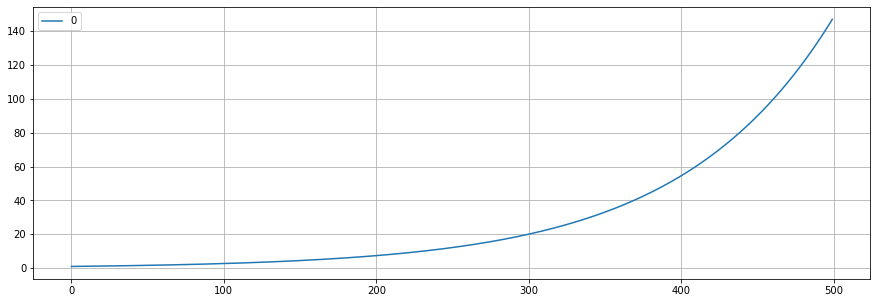

In [169]:
tamanho_vetor = 500

base_vector = np.array([i for i in range(0,tamanho_vetor)])
# seasonal = 10*np.sin(16*np.linspace(0, 2*np.pi, tamanho_vetor))
# seasonal2 = 20*np.sin(10*np.linspace(0, 2*np.pi, tamanho_vetor))
seasonal = np.zeros(tamanho_vetor)

trend_exp = np.exp(base_vector/100)
# resid = np.random.normal(loc = 0, scale = 3, size = tamanho_vetor)
resid = np.zeros(tamanho_vetor)

ts_add_exp = datas.copy()
ts_add_exp['ts'] = seasonal + trend_exp + resid 
# ts_add_exp['ts'] = seasonal + seasonal2



plt.figure(figsize = (15,5))
sns.lineplot(data =ts_add_exp.values)
# plt.xlim([0,32])
plt.grid()

# x, y, dec = get_strength_sea_trend(time_series=ts_add_exp.ts.values, model = 'mul')

(0.0, 20.0)

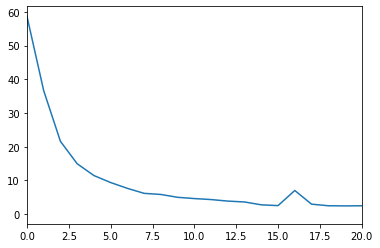

In [56]:
sns.lineplot(data = abs(np.fft.fft(ts_add_exp.ts.values))*2/500)
plt.xlim([0,20])

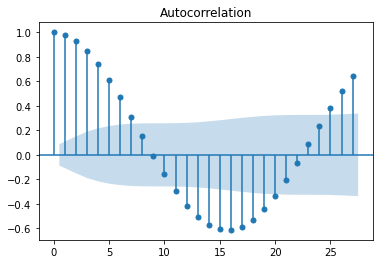

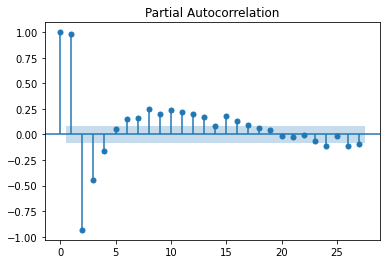

In [222]:
sgt.plot_acf(ts_add_exp);
sgt.plot_pacf(ts_add_exp);

(15.0, 20.0)

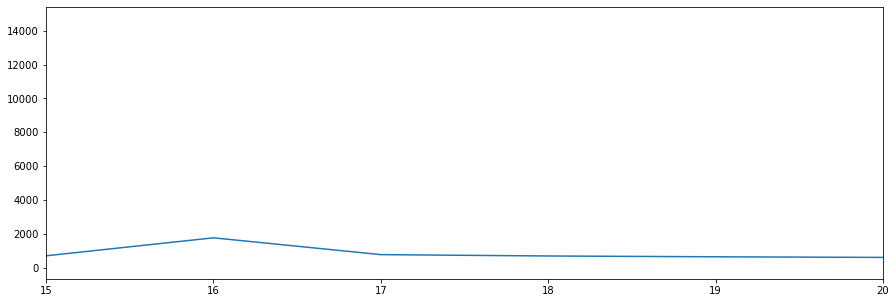

In [166]:
plt.figure(figsize=(15,5))
sns.lineplot(y = abs(np.fft.fft(ts_add_exp.ts)), x = [i for i in range(0,tamanho_vetor)])
plt.xlim([15,20])

## additive seasonality and linear trend

<AxesSubplot:>

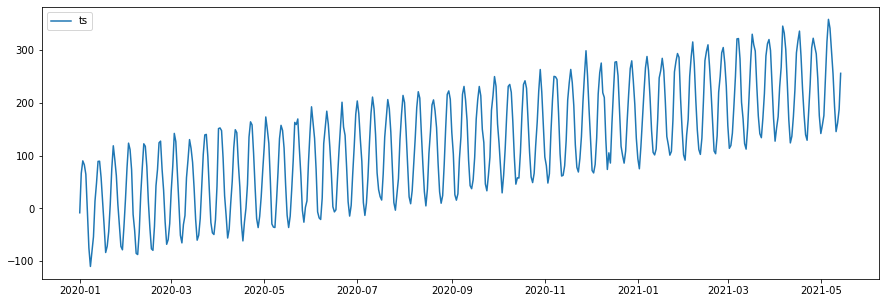

In [54]:
tamanho_vetor = 500

base_vector = np.array([i for i in range(0,tamanho_vetor)])
seasonal = 100*np.sin(np.linspace(0, 100*np.pi, tamanho_vetor))
trend_lin = np.array([i*0.5 for i in base_vector])
resid = np.random.normal(loc = 0, scale = 10, size = tamanho_vetor)

ts_add_lin = datas.copy()
ts_add_lin['ts'] = seasonal + trend_lin + resid

plt.figure(figsize = (15,5))
sns.lineplot(data = ts_add_lin)

# get_strength_sea_trend(time_series=ts_add_lin)

## multiplicative seasonality and linear trend

<AxesSubplot:>

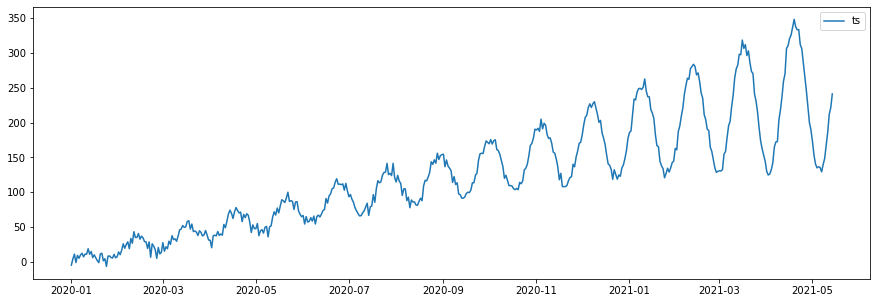

In [96]:
tamanho_vetor = 500

base_vector = np.array([i for i in range(0,tamanho_vetor)])
seasonal_mul = 10*np.sin(15*np.linspace(0, 2*np.pi, tamanho_vetor))*np.exp(base_vector/200)
trend_lin = np.array([i*0.5 for i in base_vector])
resid = np.random.normal(loc = 0, scale = 5, size = tamanho_vetor)

ts_mul_lin = datas.copy()
ts_mul_lin['ts'] = seasonal_mul + trend_lin + resid

plt.figure(figsize = (15,5))
sns.lineplot(data = ts_mul_lin)

# get_strength_sea_trend(time_series=ts_mul_lin)

## no seasonality and linear trend

<AxesSubplot:>

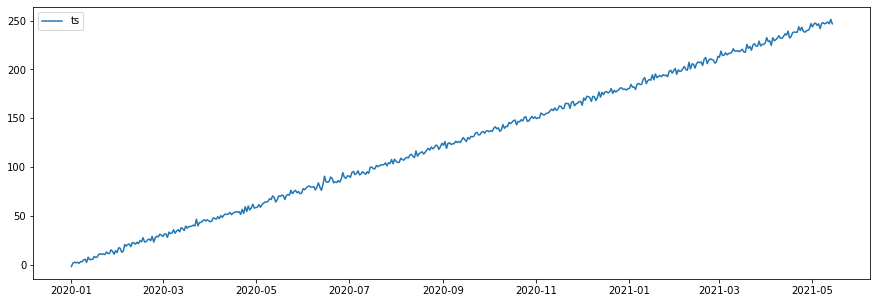

In [131]:
tamanho_vetor = 500

base_vector = np.array([i for i in range(0,tamanho_vetor)])
# seasonal_mul = 10*np.sin(np.linspace(0, 100*np.pi, tamanho_vetor))*np.exp(base_vector/300)
trend_lin = np.array([i*0.5 for i in base_vector])
resid = np.random.normal(loc = 0, scale = 2, size = tamanho_vetor)

ts_no_lin = datas.copy()
ts_no_lin['ts'] =  trend_lin + resid

plt.figure(figsize = (15,5))
sns.lineplot(data = ts_no_lin)

# get_strength_sea_trend(time_series=ts_no_lin)


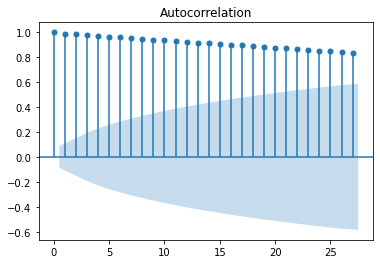

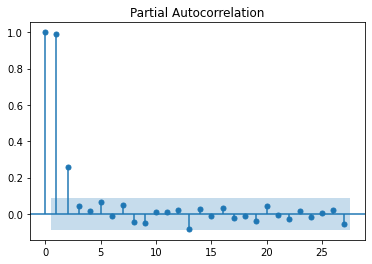

In [223]:
sgt.plot_acf(ts_no_lin);
sgt.plot_pacf(ts_no_lin);

## no seasonality and linear trend

força tendencia:  0.43670219170559577
força sazonalidade:  0.9992383490328057


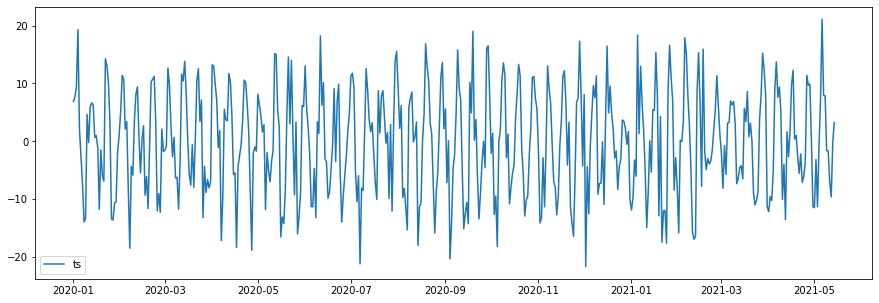

In [191]:
tamanho_vetor = 500

base_vector = np.array([i for i in range(0,tamanho_vetor)])
seasonal = 10*np.sin(np.linspace(0, 100*np.pi, tamanho_vetor))
# trend_lin = np.array([i*0.5 for i in base_vector])
resid = np.random.normal(loc = 0, scale = 5, size = tamanho_vetor)

ts_lin_no = datas.copy()
ts_lin_no['ts'] = seasonal + resid

plt.figure(figsize = (15,5))
sns.lineplot(data = ts_lin_no)

add_linear_dec = seasonal_decompose(x = ts_add_lin)
np.var(add_linear_dec.trend)

print('força tendencia: ', 1 - np.var(add_linear_dec.trend)/(np.var(add_linear_dec.trend + add_linear_dec.resid )))
print('força sazonalidade: ', 1 - np.var(add_linear_dec.seasonal)/(np.var(add_linear_dec.seasonal + add_linear_dec.resid )))

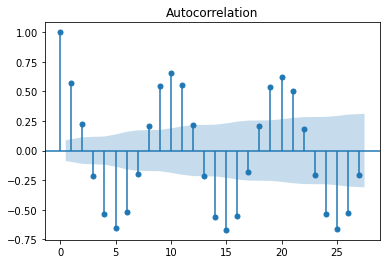

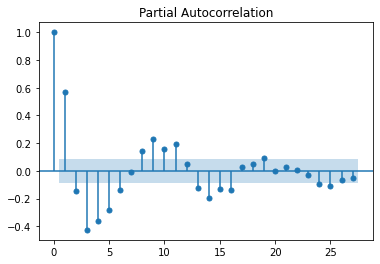

In [224]:
sgt.plot_acf(ts_lin_no);
sgt.plot_pacf(ts_lin_no);

## 1) Calcular parâmetros sazonalidade e tendência

    1.1) Realizar a transformação Box-Cox para normalizar os dados
    1.2) Fazer a decomposição da série temporal via STL
    1.3) Calcular:
        1.3.1) Para a força da sazonalidade: 1 - Var(Y*t - Tt - St)/Var(Y*t - St)
        1.3.2) Para a força da tendência:    1 - Var(Y*t - Tt - St)/Var(Y*t - Tt)

In [3]:
def prepare_dataset(df, column_date):
    
    df[column_date] = pd.to_datetime(df[column_date])
    df.index = df[column_date]
    df.index.name = ''
    idx = pd.date_range(start = df[column_date].min(),end =  df[column_date].max())

    df = df.reindex(idx, fill_value = np.nan)

    df = df.fillna(method='bfill')
    
    return df
    
    

# flights = prepare_data_set(df=flights, column_date='Month')

In [4]:
from yahoo_fin.stock_info import get_data
amazon= get_data("amzn", start_date="12/01/2018", end_date="12/04/2019", index_as_date = True, interval="1d")

<AxesSubplot:>

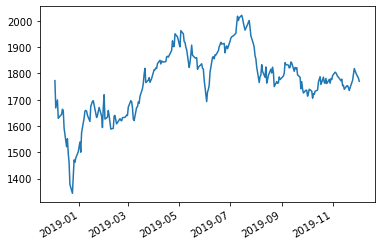

In [5]:
amazon.close.plot()

In [6]:
temperature = pd.read_csv('min_temp.csv')
flights = pd.read_csv('AirPassengers.csv')
births = pd.read_csv('female_birth.csv')
pedestres = pd.read_csv('C:/Users/samue/Desktop/UCRArchive_2018/Chinatown/Chinatown_TEST.tsv', sep = '\t', encoding='utf-8')
sunspot = sm.datasets.sunspots.data.load_pandas().endog
lynx = pmdarima.datasets.load_lynx(as_series=True)

births = prepare_dataset(df = births, column_date='Date')
temperature = prepare_dataset(df = temperature, column_date='Date')

flights['Month'] = pd.to_datetime(flights['Month'])
flights.index = flights['Month']
flights.index.name = ''

In [7]:
datasets = {
    'lynx':lynx,
    'sunspot': sunspot, 
    'temp':temperature.Temp,
    'flights': flights['#Passengers'],
    "births":births.Births, 
    'amazon':amazon.close
}

In [176]:
def get_frequency(array_like, plot = False):
    
    fft_raw = abs(np.fft.fft(array_like))
    fft_final = fft_raw[0: int(len(fft_raw)/2 + 1)]*2/len(fft_raw)
    
    freq = pd.DataFrame(fft_final).sort_values(by = 0, ascending=False).index[1]
    
    if(plot):
        plt.figure(figsize=(15,5))
        sns.lineplot(data = fft_final, label= f'Most important frequency: {freq}' )
#         plt.text(s = f'{freq}')
        
    return pd.DataFrame(fft_final).sort_values(by = 0, ascending=False)

In [178]:
def get_seasonality_and_trend(x):
    
    # doing the box-cox transformation
    complete_data = pd.DataFrame(x)
    
    x_array = x.values
    
    if(min(x_array) <= 0):
        x_array = x_array - min(x) + 1
            
    bc_obj =  boxcox(x_array)
    lmbda = bc_obj[1]
    transformed_series = bc_obj[0]
    
    complete_data['box_cox'] = transformed_series    
    
    
    period = get_periodicity(x_array, plot_bool = False)
#     print(period)
    
    # calcule of seasonality strenght
    if(period != 1):   
        dec = seasonal_decompose(complete_data['box_cox'], period = period)
        seasonal_strength = 1 - np.var(dec.resid)/np.var(dec.resid + dec.seasonal)
    else:
        dec = seasonal_decompose(complete_data['box_cox'])
        seasonal_strength = 0
    
    # calcule of trend strenght
    
    trend_strength = 1 - np.var(dec.resid)/np.var(dec.resid + dec.trend)
    
    return {'trend': trend_strength, 'seasonal': seasonal_strength}
    
# get_seasonality_and_trend(births.Births)

def get_skewness(x):
    
    n = len(x)
    sig = np.sqrt(np.var(x))
    mean = np.mean(x)
    
    cubic_sum = 0
    
    for xt in x:
        cubic_sum = cubic_sum + (xt - mean)**3
        
    skw = (1/(n*(sig**3)))*cubic_sum
    
    return skw


def get_kurtosis(x):
    
    n = len(x)
    sig = np.sqrt(np.var(x))
    mean = np.mean(x)
    
    sum_4 = 0
    
    for xt in x:
        sum_4 = sum_4 + (xt - mean)**4
        
    skw = (1/(n*(sig**4)))*sum_4 - 3
    
    return skw
        
# get_kurtosis(np.random.normal(size = 20000))
# get_seasonality_and_trend(x = births.Births)
# get_seasonality_and_trend(x = ts_no_lin.ts)

In [192]:
for name, ds in datasets.items():
    print(name, get_seasonality_and_trend(x = ds))

lynx {'trend': 0.23488845446964446, 'seasonal': 0.43385262796145074}
sunspot {'trend': 0.3234478732722409, 'seasonal': 0.4157619273438746}
temp {'trend': 0.02716689469616229, 'seasonal': 0.5966327156635347}
flights {'trend': 0.9910510218563646, 'seasonal': 0.9212048297717002}
births {'trend': 0.2956119681897069, 'seasonal': 0}
amazon {'trend': 0.799484306304813, 'seasonal': 0.4677405443338323}


C:\Users\samue\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  )


In [193]:
for name, ds in datasets.items():
    print(name, get_kurtosis(x = ds))

lynx 1.4627215756024867
sunspot 0.4110233499827216
temp -0.06456333584828222
flights -0.3937721709128108
births 0.75052196032739
amazon 0.4541584822299334


In [194]:
for name, ds in datasets.items():
    print(name, get_skewness(x = ds))

lynx 1.3496750123237367
sunspot 0.9857343925899004
temp 0.1713028635493827
flights 0.577068234901525
births 0.44554790047635456
amazon -0.47081562880004757


## 2) Calcular periodicidade

    2.1) Detrend the serie with cubic spline using three knots
    2.2) Find the autocorrelation 
    2.3) find the peaks and troughs in the series that obey the conditions exposed

In [312]:
# do_regression_spline(x = flights['#Passengers'].values)

In [52]:
def do_regression_spline(x, number_of_knots = 3):
    
    base_knot = (len(x))/(number_of_knots+1)
    knots = [int(i*base_knot) for i in range(1, number_of_knots + 1)]
    transformed_x = dmatrix(f"bs(train, knots={knots}, degree=3, include_intercept=False)", 
                        {"train": np.array(range(0,len(x)))},
                        return_type='dataframe')

    fit1 = sm.GLM(x, transformed_x).fit()

    pred = fit1.predict(dmatrix(f"bs(valid, knots={knots}, include_intercept=False)", {"valid": np.array(range(0,len(x)))}, return_type='dataframe'))
    
        
    return pred

def get_periodicity(x, number_of_knots = 3, plot_bool = True, figsize = (15,5)):
    
    pred1 = do_regression_spline(x = x,
                                 number_of_knots = number_of_knots)
    
    auto_corr_df = pd.DataFrame()
    auto_corr_obj = acf(x - pred1, nlags=int(len(x)/3), alpha=0.05)
    
    auto_corr_df['acf'] = auto_corr_obj[0]
    
    if(int(len(auto_corr_df)/12) < 5):
        window = 5
    else:
        window = int(len(auto_corr_df)/12)
    
    
    auto_corr_df['moving_averge'] = auto_corr_df.rolling(window= window, center=True).mean()
    
    ma = auto_corr_df.moving_averge.values
    

    peaks, _= find_peaks(ma, distance=5)
    troughs, _= find_peaks(-ma, distance=5)
    
    if(plot_bool):
        
        rows = '1'
        columns = '2'
        
        
        plt.figure(figsize = figsize)
        plt.subplot(int(rows + columns + '1'))
        
        plt.plot(np.array(range(0,len(x))), x, label = 'Original')
        plt.plot(np.array(range(0,len(x))), pred1, label = f'Cubic spline, {number_of_knots} knots')
        plt.plot(np.array(range(0,len(x))), x -  pred1, label = 'Detrended')
        plt.legend()
        
        plt.subplot(int(rows + columns + '2'))
        plt.plot(ma)
        plt.plot(peaks,ma[peaks], '^')
        plt.plot(troughs,ma[troughs], 'v')
#         plt.xlim([0,50])
        
        frequency = 1
        
#         min(len(peaks), len(troughs))
        
#     print(peaks)
#     print(troughs)

    for index in range(0, min(len(peaks), len(troughs))):
        if(peaks[0] < troughs[0]):
#             print(peaks[index + 1], troughs[index], peaks[index + 1] - troughs[index])
            
            acf_peak = auto_corr_df['acf'].iloc[peaks[index + 1]]
            acf_trough = auto_corr_df['acf'].iloc[troughs[index]]
            
            if((acf_peak - acf_trough) < 0.1):
                continue
            else:
                return peaks[index + 1]
                print((acf_peak - acf_trough))
        else:
            acf_peak = auto_corr_df['acf'].iloc[peaks[index]]
            acf_trough = auto_corr_df['acf'].iloc[troughs[index]]
            
#             print((acf_peak - acf_trough))
            
            if((acf_peak - acf_trough) > 0.1):
#                 print('menor peaks', peaks[index], 'trohug', troughs[index], acf_peak - acf_trough)
                return peaks[index]
            else:
                pass
#                 return peaks[index + 1]
#                 print('maior peaks', peaks[index], 'trohug', troughs[index], acf_peak - acf_trough)
    
    
    
    return 1
        
# teste_per = get_periodicity(flights['#Passengers'].values, plot_bool=False)
# teste_per_1 = get_periodicity(flights['#Passengers'].values, plot_bool=True)
# teste_per_2 = get_periodicity(temperature.Temp.values, number_of_knots = 3, plot_bool=True)
# teste_per_3 = get_periodicity(births.Births.values, number_of_knots = 3, plot_bool=True)

lynx 10
sunspot 11
temp 366
flights 12
births

C:\Users\samue\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  )
C:\Users\samue\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  )
C:\Users\samue\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  )
C:\Users\samue\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  )


 1
amazon 58


C:\Users\samue\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  )


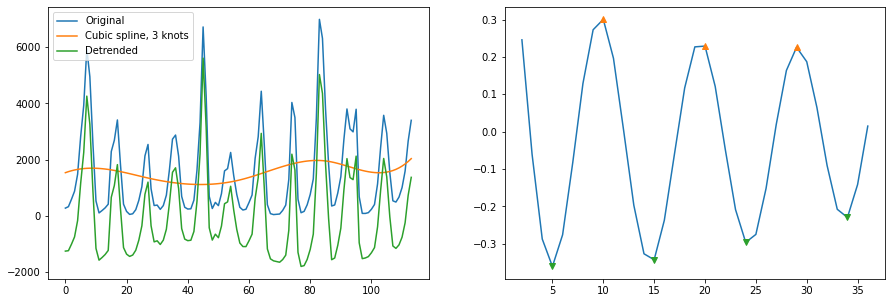

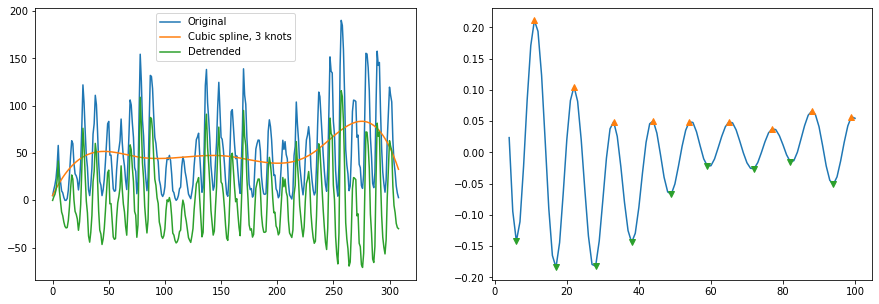

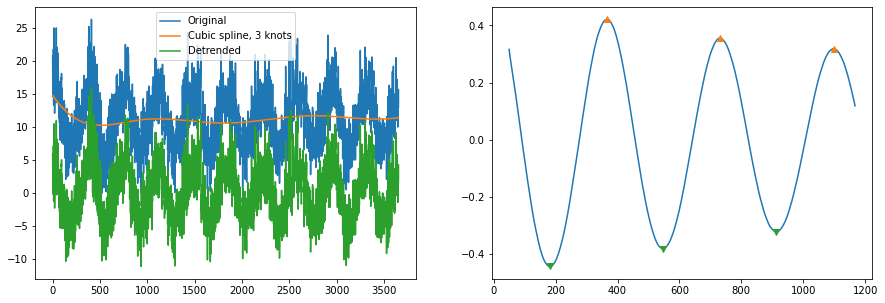

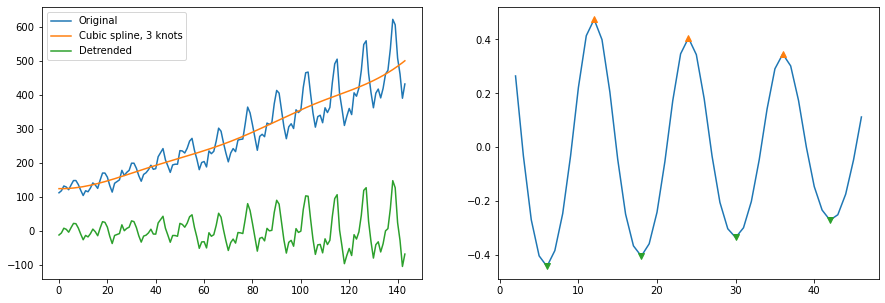

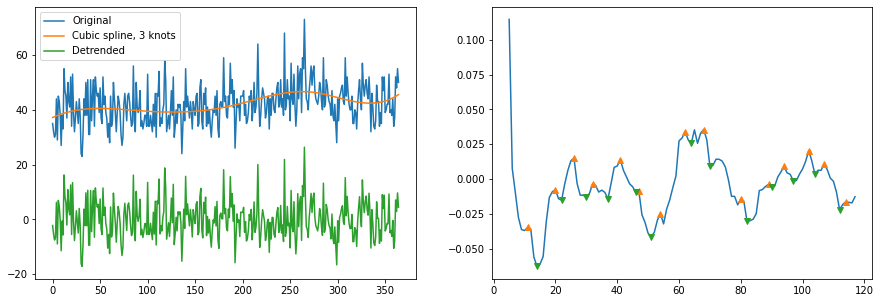

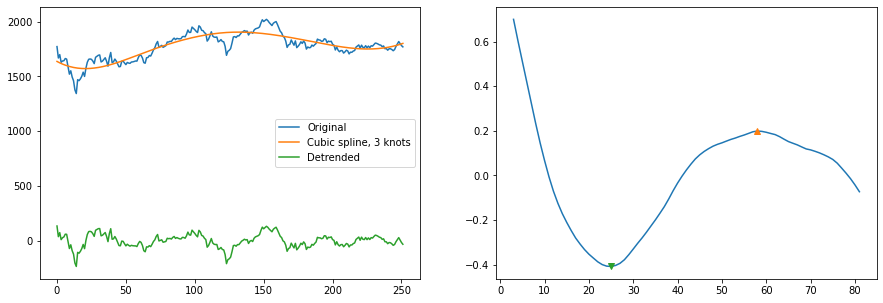

In [195]:
for name, ds in datasets.items():
    print(name, get_periodicity(x = ds.values))

## Linearidade


In [53]:
def get_linearity(x):
    
    if(type(x) == type(pd.Series([1,2]))):
        used_x = x.values
    else:
        used_x = x
    
    period = get_periodicity(x = used_x, plot_bool=False)
    
    df = pd.DataFrame()
    df['x'] = x
    df['lag'] = df.x.shift(period)
    
    
    return df.corr().loc['x', 'lag']

# get_linearity()

0.2178772700673127

In [196]:
for name, ds in datasets.items():
    print(name ,get_linearity(x = ds))

lynx 0.5731572974868085
sunspot 0.6721213066213503
temp 0.5528403756706822
flights 0.9905273692085443
births 0.2178772700673127
amazon 0.07515965701168291


C:\Users\samue\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  )


<AxesSubplot:xlabel='close', ylabel='close'>

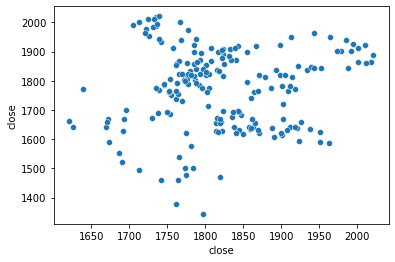

In [198]:
col = 'close'
df = amazon
lag = 58
sns.scatterplot(x = df[col], y = df[col].shift(lag))

<AxesSubplot:>

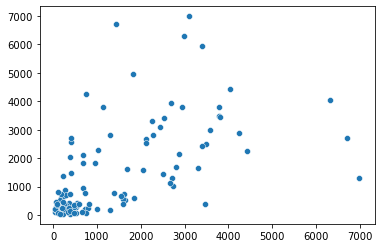

In [201]:
# col = 'close'
df = lynx
lag = 10
sns.scatterplot(x = df, y = df.shift(lag))

<AxesSubplot:xlabel='SUNACTIVITY', ylabel='SUNACTIVITY'>

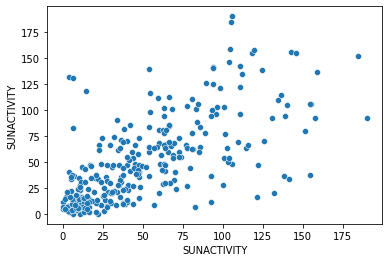

In [202]:
# col = 'close'
df = sunspot
lag = 11
sns.scatterplot(x = df, y = df.shift(lag))

In [21]:
x = np.array([i for i in range(1, len(flights) + 1)]).reshape(1, -1)

In [25]:
x = [i for i in range(1, len(flights) + 1)]

In [33]:
x = np.array([i for i in range(1, len(flights) + 1)]).reshape(1, -1 )

<AxesSubplot:>

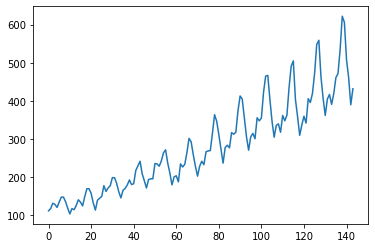

In [17]:
flights['#Passengers'].plot()

<AxesSubplot:xlabel='#Passengers', ylabel='#Passengers'>

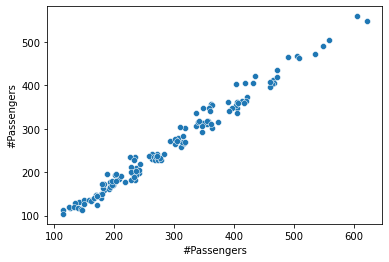

In [388]:
col = '#Passengers'
df = flights
lag = 12 
sns.scatterplot(x = df[col], y = df[col].shift(lag))

<AxesSubplot:xlabel='Births', ylabel='Births'>

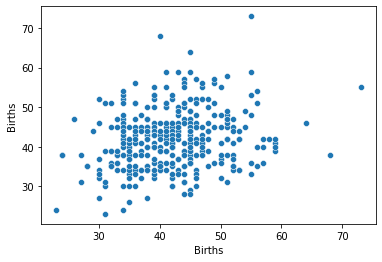

In [206]:
col = 'Births'
df = births
lag = 1
sns.scatterplot(x = df[col], y = df[col].shift(lag))

<AxesSubplot:xlabel='Temp', ylabel='Temp'>

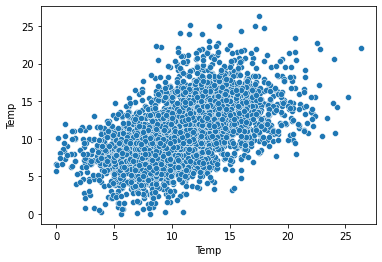

In [207]:
col = 'Temp'
df = temperature
lag = 365
sns.scatterplot(x = df[col], y = df[col].shift(lag))

In [202]:
def terasvirtas_test(y,x = None, scale = True, test_type = 'Chisq'):
    
    y_raw = y.copy()
    
    if(x == None):
        x = np.array([i for i in range(1, len(y) + 1)]).reshape(1, -1)
        
    if(type(y) != type(np.array([1,1,2,3]))):
        if(type(y) == type(pd.Series([1]))):
            y = y.values.reshape(1, -1)
        else:
            y = np.array(y).reshape(1, -1)
            
            
    
            
    df = pd.DataFrame()
    df['x'] = x[0]
    df['y'] = y[0]
    
    mod = smf.ols(formula='y ~ x', data=df)

    res = mod.fit()
    u = res.resid
    print(res.summary())
    df['u'] = u
    nin = 1
    m = 0
    ssr0 = sum(u*u)
    xnam2 = ''
    
    for i in range(1,nin + 1):
        for j in range(i,nin + 1):
            xnam2 = xnam2 + f"I(x*x)"
            m = m+1


    xnam3 = ''
    for i in range(1,nin+1): 
        for j in range(i,nin+1):
            for k in range(j,nin+1):
                xnam3 = f"I(x*x*x)"    
                m = m+1

    
    fmla2 = 'u ~' + ' x' + ' + ' + xnam2 +' + '+ xnam3
    
    print(fmla2)
    
        
    mod2 = smf.ols(formula=fmla2, data=df)
    res2 = mod2.fit()
#     print(res2.summary())
    v = res2.resid
    df['v'] = v
    
    ssr = sum(v*v)
    
    t = len(y_raw)
    
#     print(ssr, ssr0)
    
    if(test_type == 'Chisq'):
        stat = t * np.log(ssr0/ssr)
        pval = 1 - chi2.cdf(x = stat, df = m)
        

        
#         print({
#             'ssr': ssr,
#             'ssr0': ssr0,
#             'pval': pval,
#             'stat': stat,
#             'm':m,
#             't':t
#         })
    
        return pval
    
    elif(test_type == 'F'):
        stat = ((ssr0-ssr)/m)/(ssr/(t-nin-m))
        pval = 1 - f.cdf(stat, m,t-nin-m)
        
#         print({
#             'ssr': ssr,
#             'ssr0': ssr0,
#             'pval': pval,
#             'stat': stat,
#             'm':m,
#             't':t
#         })
    
        return pval

    
    


# terasvirtas_test(x = None, y = flights['#Passengers'], test_type='F')
# terasvirtas_test(x = None, y = births['Births'], test_type='F')
terasvirtas_test(x = None, y = ts_no_lin.ts, test_type='F')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 2.694e+04
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:06:44   Log-Likelihood:                -1845.9
No. Observations:                 500   AIC:                             3696.
Df Residuals:                     498   BIC:                             3704.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8620      0.871      0.989      0.3

0.9058097823445534

In [361]:
sunspot = sm.datasets.sunspots.data.load_pandas()
# df.data.SUNACTIVITY.plot()

In [251]:
from tqdm import tqdm

In [288]:
count = 0
numero_testes = 120000
p_err = []
for i in tqdm(range(0, numero_testes)):
    base_vector = np.array([i for i in range(0,tamanho_vetor)])
    # seasonal_mul = 10*np.sin(np.linspace(0, 100*np.pi, tamanho_vetor))*np.exp(base_vector/300)
    trend_lin = np.array([i*0.5 for i in base_vector])
    resid = np.random.normal(loc = 0, scale = 0.01, size = tamanho_vetor)

    ts_no_lin = datas.copy()
    ts_no_lin['ts'] =  trend_lin + resid
    
    p = terasvirtas_test(x = None, y = ts_no_lin.ts, test_type='Chisq')
    

    p_err.append(p)

len(p_err)/numero_testes

100%|██████████████████████████████████████████████████████████████████████████| 120000/120000 [59:49<00:00, 33.43it/s]


1.0

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 41.37it/s]


[0.0]

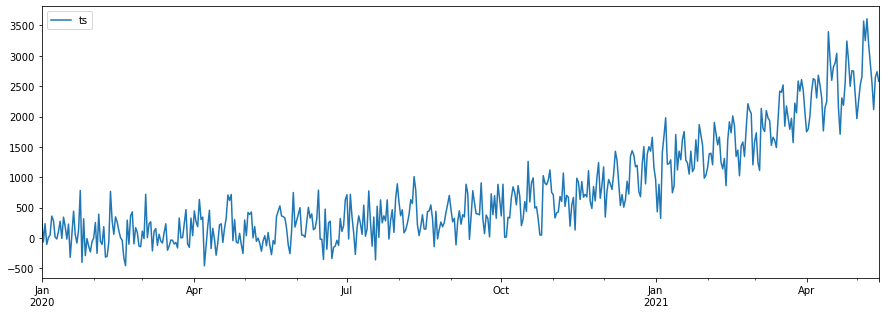

In [341]:
count = 0
numero_testes = 1
p_err_2 = []
for i in tqdm(range(0, numero_testes)):
    base_vector = np.array([i for i in range(0,tamanho_vetor)])
    seasonal_mul = 100*np.sin(np.linspace(0, 100*np.pi, tamanho_vetor))*np.exp(base_vector/300)
    trend_lin = np.array([i*0.5 for i in base_vector])*np.exp(base_vector/200)
#     trend_lin = 20*np.array([i*0.5 for i in base_vector])*np.log(2*base_vector)
    resid = np.random.normal(loc = 0, scale = 250, size = tamanho_vetor)

    ts_no_lin = datas.copy()
    ts_no_lin['ts'] =   seasonal_mul + trend_lin + resid
    
    p = terasvirtas_test(x = None, y = ts_no_lin.ts, test_type='Chisq')
    

    p_err_2.append(p)

# len(p_err_2)/numero_testes
ts_no_lin.plot(figsize = (15,5))
p_err_2

In [323]:
p_err_2

[0.0]

0.9052690498933512
{'ssr': 47088.20530911183, 'ssr0': 47106.95449498829, 'pval': 0.9058097823445534, 'stat': 0.0989456416891586, 'm': 2, 't': 500}


0.9058097823445534

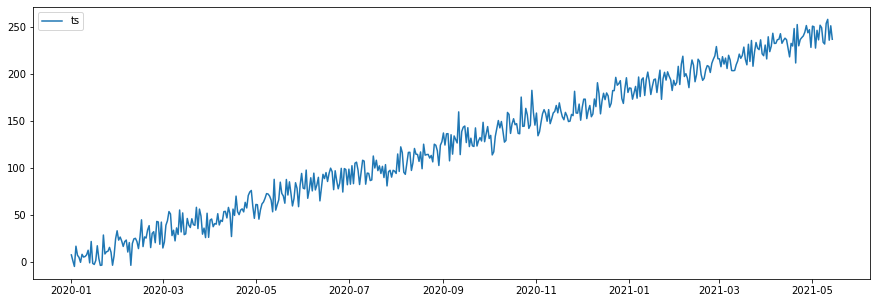

In [69]:
tamanho_vetor = 500

base_vector = np.array([i for i in range(0,tamanho_vetor)])
# seasonal_mul = 10*np.sin(np.linspace(0, 100*np.pi, tamanho_vetor))*np.exp(base_vector/300)
trend_lin = np.array([i*0.5 for i in base_vector]) #* np.exp(np.array([i*0.5 for i in base_vector])*0.01)
resid = np.random.normal(loc = 0, scale = 10, size = tamanho_vetor)

ts_no_lin = datas.copy()
ts_no_lin['ts'] =  trend_lin + resid

plt.figure(figsize = (15,5))
sns.lineplot(data = ts_no_lin)

# get_strength_sea_trend(time_series=ts_no_lin)
print(terasvirtas_test(x = None, y = ts_no_lin.ts, test_type='Chisq'))
terasvirtas_test(x = None, y = ts_no_lin.ts, test_type='F')

## 4) Serial Correlation

In [209]:
def get_serial_correlation(x, lags = 20, method = 'Box-Pierce', fitdf = 0):
    
    cor = acf(x = x, nlags=lags)
    if(type(x) == type(pd.Series([1,2]))):
        n = sum(~x.isna()) 
    else:
        n = sum(~np.isnan(np.array(x)))
    parameter = lag - fitdf
    obs = np.array(cor[1:])
#     print()
    
    if(method == "Box-Pierce"):
        statistic = n * sum(obs**2)
        pval = 1 - chi2.cdf(x = statistic, df = lags - fitdf)
#         pass

        return {'stat':statistic, 'pval':pval }
    
    
get_serial_correlation(x = births.Births, lags=20)
get_serial_correlation(x = flights['#Passengers'], lags=20)
get_serial_correlation(x = np.random.normal(loc = 0, scale = 10, size = 100), lags=20)
get_serial_correlation(x = ts_no_lin.ts, lags=20)

C:\Users\samue\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  )


{'stat': 8777.06451010837, 'pval': 0.0}

In [185]:
datasets

{'lynx': 1821     269.0
 1822     321.0
 1823     585.0
 1824     871.0
 1825    1475.0
          ...  
 1930     662.0
 1931    1000.0
 1932    1590.0
 1933    2657.0
 1934    3396.0
 Length: 114, dtype: float64,
 'sunspot': YEAR
 1700.0     5.0
 1701.0    11.0
 1702.0    16.0
 1703.0    23.0
 1704.0    36.0
           ... 
 2004.0    40.4
 2005.0    29.8
 2006.0    15.2
 2007.0     7.5
 2008.0     2.9
 Name: SUNACTIVITY, Length: 309, dtype: float64,
 'temp': 1981-01-01    20.7
 1981-01-02    17.9
 1981-01-03    18.8
 1981-01-04    14.6
 1981-01-05    15.8
               ... 
 1990-12-27    14.0
 1990-12-28    13.6
 1990-12-29    13.5
 1990-12-30    15.7
 1990-12-31    13.0
 Freq: D, Name: Temp, Length: 3652, dtype: float64,
 'flights': 
 1949-01-01    112
 1949-02-01    118
 1949-03-01    132
 1949-04-01    129
 1949-05-01    121
              ... 
 1960-08-01    606
 1960-09-01    508
 1960-10-01    461
 1960-11-01    390
 1960-12-01    432
 Name: #Passengers, Length: 144, dtype: in

In [205]:
for name, ds in datasets.items():
    print(name, get_serial_correlation(x = ds, lags=20))

lynx {'stat': 328.6805837914843, 'pval': 0.0}
sunspot {'stat': 959.8069184526033, 'pval': 0.0}
temp {'stat': 23537.75336518886, 'pval': 0.0}
flights {'stat': 1328.5322484628452, 'pval': 0.0}
births {'stat': 79.74699503116726, 'pval': 4.3338314048568805e-09}
amazon {'stat': 2636.9218144001925, 'pval': 0.0}


In [5]:
df = pd.DataFrame()
x = np.array([i for i in range(0,100)])
y = x*5
resid = np.random.normal(0, 5, 100)
# sns.lineplot(x = x, y = y+resid)

df['x'] = x
df['y'] = y + resid

mod = smf.ols(formula='y ~ x', data=df)
res = mod.fit()
# fitted_line = res.predict(x)
# sns.lineplot(x = x, y = y+resid)
# sns.lineplot(x = x, y = res.predict(x))
# mod.predict(x)
# for i in range(0,10):
    

## Self-similarity

- H < 0.5 — a mean-reverting (anti-persistent) series. The closer the value is to 0, the stronger the mean-reversion process is. In practice, it means that a high value is followed by a low value and vice-versa.

- H = 0.5 — a geometric random walk.

- H > 0.5 — a trending (persistent) series. The closer the value is to 1, the stronger the trend. In practice, it means that a high value is followed by a higher one.

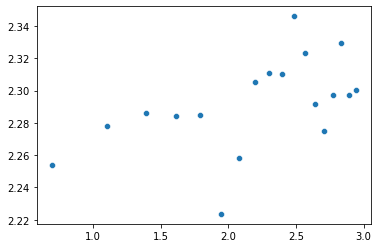

0.02309001680900848

In [232]:
def get_hurst_exponent(x, max_lag=20, plot = False):
    """Returns the Hurst Exponent of the time series"""
    
    if(type(x) == type(pd.Series([1,2]))):
        x = x.values 
    else:
        pass
    
    lags = range(2, max_lag)

    # variances of the lagged differences
    tau = [np.std(np.subtract(x[lag:], x[:-lag])) for lag in lags]

    # calculate the slope of the log plot -> the Hurst Exponent
    reg = np.polyfit(np.log(lags), np.log(tau), 1)
    
    if(plot):
        sns.scatterplot(x = np.log(lags), y = np.log(tau))
        plt.show()
    
    if(reg[0] < 0):
        return 0

    return reg[0]

get_hurst_exponent(x = births.Births, max_lag=20, plot = True)

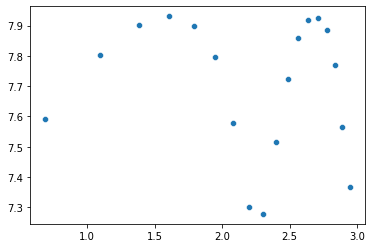

lynx 0


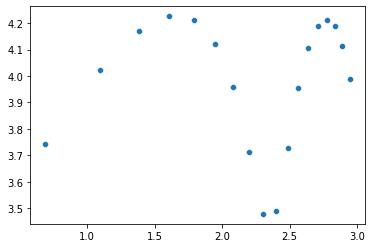

sunspot 0.024922409807690164


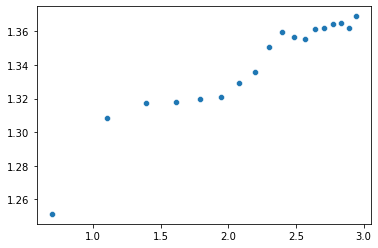

temp 0.043933932667160586


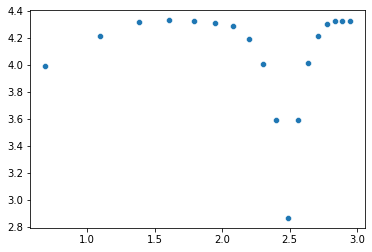

flights 0


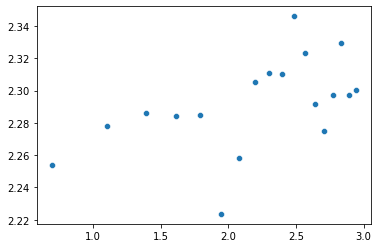

births 0.02309001680900848


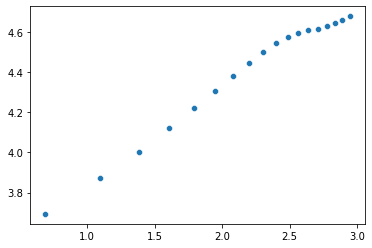

amazon 0.4521395472714348


In [233]:
for name, ds in datasets.items():
    print(name, get_hurst_exponent(x = ds, max_lag=20, plot = True))

## Chaos - Lyapunov exponent


In [183]:
from math import log
# from tqdm import tqdm

def get_lyapunov_exponent(data, plot = False, plot_pos = 0, list_of_mins_bool = True):
    
    N = len(data)
    
    lyapunovs = {}
    list_of_mins = []
    for i in range(0, N):
        temp = []
        for j in range(1, N):
    #         print(i, j)
            temp.append(abs(data.iloc[i] - data.iloc[j]))
    
        list_of_mins.append(min(temp))
    data = data.values
    for i in tqdm(range(N)):
#         print(i)
        for j in range(i + 1, N):
#             print(i,j)
#             print(data[i], data[j], data[i] - data[j])
            if np.abs(data[i] - data[j]) < list_of_mins[i] + 1:
                lyapunovs[(i, j)] = []
#                 print(min(N - i, N - j))
                for k in range(min(N - i, N - j)):
#                     print(data[i+k] - data[j+k])
                    if(data[i+k] - data[j+k] != 0):
                        lyapunovs[(i, j)].append(log(np.abs(data[i+k] - data[j+k])))
                    else:
                        lyapunovs[(i, j)].append(1)
#                     break
    lya_exp = []
    for key, value in lyapunovs.items():
        df = pd.DataFrame()
        df['x'] = list(range(0,len(value)))
        df['y'] = value
        fmla = 'y ~ x'

#         print(fmla2)


        model = smf.ols(formula=fmla, data=df)
        res = model.fit()
#         print(df.shape)
        
        if plot:
            df['pred'] = [res.params['x']*i + res.params['Intercept'] for i in range(0,len(value))]
            print('exp', res.params['x'])
            df[['y', 'pred']].plot()
            plt.show()
            


            return None
    
        lya_exp.append(res.params['x'])
        
    return sum(lya_exp)/len(lyapunovs)
        
# print(births.Births)
f = get_lyapunov_exponent(data = datasets['flights'], plot = False)

100%|██████████████████████████████████████████████████████████████████████████████| 144/144 [00:00<00:00, 4948.99it/s]


In [172]:
# get_lyapunov_exponent(data = ts_add_exp['ts'], plot = True)

In [163]:
datasets.keys()

dict_keys(['lynx', 'sunspot', 'temp', 'flights', 'births', 'amazon'])

In [182]:
for name, ds in datasets.items():
    if(name !="temp"):
        print(name, get_lyapunov_exponent(data = ds))

100%|██████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 7549.91it/s]


lynx 0.07059052587067363


100%|███████████████████████████████████████████████████████████████████████████████| 309/309 [00:00<00:00, 815.29it/s]


sunspot 0.07243253957134571


100%|██████████████████████████████████████████████████████████████████████████████| 144/144 [00:00<00:00, 5144.06it/s]


flights 0.09282273397581961


100%|███████████████████████████████████████████████████████████████████████████████| 365/365 [00:01<00:00, 296.75it/s]


births 0.014409657250825452


100%|██████████████████████████████████████████████████████████████████████████████| 252/252 [00:00<00:00, 2261.54it/s]


amazon 0.14414397256407505


100%|██████████████████████████████████████████████████████████████████████████████| 114/114 [00:00<00:00, 8149.28it/s]

lynx
exp -0.0004160346411738866


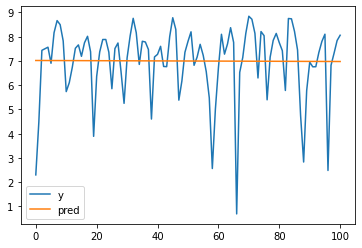

sunspot


100%|███████████████████████████████████████████████████████████████████████████████| 309/309 [00:00<00:00, 838.59it/s]


exp -0.0006802068002907697


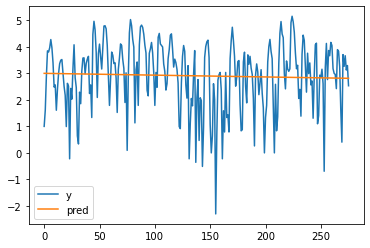

flights


100%|██████████████████████████████████████████████████████████████████████████████| 144/144 [00:00<00:00, 5521.80it/s]


exp 0.005505430024314572


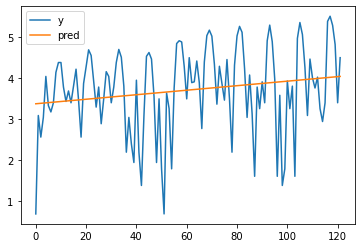

births


100%|███████████████████████████████████████████████████████████████████████████████| 365/365 [00:01<00:00, 298.47it/s]


exp 0.0004753008382512731


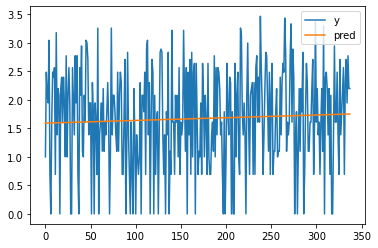

amazon


100%|██████████████████████████████████████████████████████████████████████████████| 252/252 [00:00<00:00, 2087.98it/s]


exp -0.008530688569915276


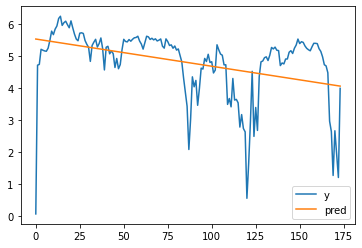

In [184]:
for name, ds in datasets.items():
    if(name !="temp"):
        print(name)
        get_lyapunov_exponent(data = ds, plot = True)

In [104]:
# list_of_mins = []
# data = datasets['amazon']
# for i in range(0, len(data)):
#     temp = []
#     for j in range(1, len(data)):
# #         print(i, j)
#         temp.append(abs(data.iloc[i] - data.iloc[j]))
    
#     list_of_mins.append(min(temp))

# list_of_mins

In [105]:
f.keys()

dict_keys([(0, 22), (1, 11), (5, 15), (6, 7), (18, 19), (26, 29), (28, 46), (30, 31), (37, 58), (43, 72), (48, 49), (51, 62), (52, 69), (52, 71), (54, 65), (56, 82), (69, 71), (77, 96), (79, 105), (88, 109), (91, 131), (92, 100), (93, 95), (99, 111), (104, 116), (110, 130), (125, 136), (135, 141)])

<AxesSubplot:>

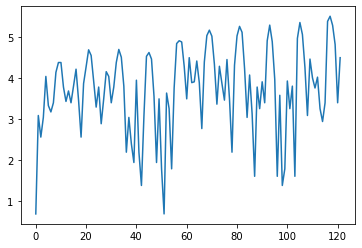

In [103]:
num = list(f.keys())[0]

sns.lineplot(x =list(range(0, len(f[num]))) , y = f[num])
